# PCA

* By Wai Ping Jerry KWOK
* Created on 2023-10-18

### Objective
To use PCA to improve upon the clustering and visualization done in assignment 2.

### Data
Obtained from Credit Card Dataset for Clustering | Kaggle (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata), original source unknown.

### Problem Statement
The marketing department for a credit card company wants to learn more about the different kinds of customers they have in order to develop a marketing strategy that targets each group separately. As a data scientist, your job is to find the best way to divide the customers into groups and you want to see if using PCA can help. In the end you will need to provide a description of each group to be used by the marketing strategists.

### Steps to be completed
Create a Jupyter notebook and complete the following steps:

In [1]:
# import libraries for use
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
from joblib import dump, load
from kneed import KneeLocator

# import sklearn for use
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# import scipy for use
from scipy.cluster.hierarchy import fcluster, linkage

#### 1. Data -- copy the relevant section from your notebook for assignment 2. The steps here are included for reference but are not worth marks.
**1. Load *CC General.csv* into a pandas dataframe. Print out the header. Use *pandas.DataFrame.describe* to summarize the data. Using markdown, explain the meaning of each column and make observations about the dataset.**

In [2]:
# load the entire csv files as DataFrame using Pandas
df = pd.read_csv('CC General.csv', delimiter=',')

In [3]:
# print out the header
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
# summarize the data
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

** Observations:**
* There are 8,950 entries in the dataset with 18 variables.

* Data descriptions
1. CUST_ID : Identification of the credit card holder
2. BALANCE : Balance amount left in their account to make purchases (numeric)
3. BALANCE_FREQUENCY : How frequent the balance is updated, value between 0 and 1 (binary, 1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account (numeric)
5. ONEOFF_PURCHASES : Maximum purchase amount done in one purchase (one-go) (numeric)
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment (numeric)
7. CASH_ADVANCE : Cash in advance given by the user (numeric)
8. PURCHASES_FREQUENCY : How frequent purchases are being made, score between 0 and 1 (binary, 1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF_PURCHASES_FREQUENCY : How frequent purchases are happening in one-go (binary, 1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES_INSTALLMENTS_FREQUENCY : How frequent purchases in installments are being done (binary, 1 = frequently done, 0 = not frequently done)
11. CASH_ADVANCE_FREQUENCY : How frequent the cash in advance is being paid (numeric)
12. CASH_ADVANCE_TRX : Number of transactions made with 'Cash in Advanced' (numeric)
13. PURCHASES_TRX : Number of purchase transactions made (numeric)
14. CREDIT_LIMIT : credit limit of credit card for user (numeric)
15. PAYMENTS : Amount of payment done by user (numeric)
16. MINIMUM_PAYMENTS : Minimum amount of payments made by user (numeric)
17. PRC_FULL_PAYMENT : Percent of full payment paid by user (numeric)
18. TENURE : Tenure of credit card service for user (numeric)

* CUST_ID is for identification of a customer, we should drop this information before analysis.
* For BALANCE_FREQUENCY, PURCHASES_FREQUENCY, ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, we should investigate further the definition of 0 (not frequently updated) and 1 (frequently updated). We should know 'how many times' would be deemed as frequent and vice versa.
* For CASH_ADVANCE_FREQUENCY, we should investigate the definition of calculation behind this numerical value. It does not behave like other frequency feature that comes only with 0 and 1.
* We should understand the definition of BALANCE, CASH_ADVANCE from the business unit. The data description is not clear for the context.
* The features are in different range. We should apply scaler before fitting into model.

**2. Use *pandas.DataFrame.info* to check if the entries are the correct datatype, and if there are any missing values. Use *pandas.DataFrame.duplicates* to check for duplicate entries. Fix the dataset so that there are no missing values, duplicate rows, or incorrect data types. Use markdown to make observations and explain what you have done.**

In [5]:
# display the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
# check for duplicated values
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

**Obeservations**
1. All the data are numerical data except CUST_ID.
2. There is no duplicated rows.
3. There are 313 entries in MINIMUM_PAYMENTS and 1 entry in CREDIT_LIMIT with missing values. We fill in the missing values with the average from the features using .fillna() and .mean()

In [8]:
# fill the missing values with mean
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)

In [9]:
# check for missing values
df.isnull().sum().sort_values(ascending=False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

The missing values are fixed. There are no missing values, duplicate rows, or incorrect data types in the data set.

**3. Drop the 'CUST_ID' column. Use *seaborn.heatmap* to display the correlation matrix of the features. Use *seaborn.pairplot* to generate scatter plots and histograms. Use markdown to make observations.**

In [10]:
# drop the CUST_ID column
X = df.drop(columns=['CUST_ID'])

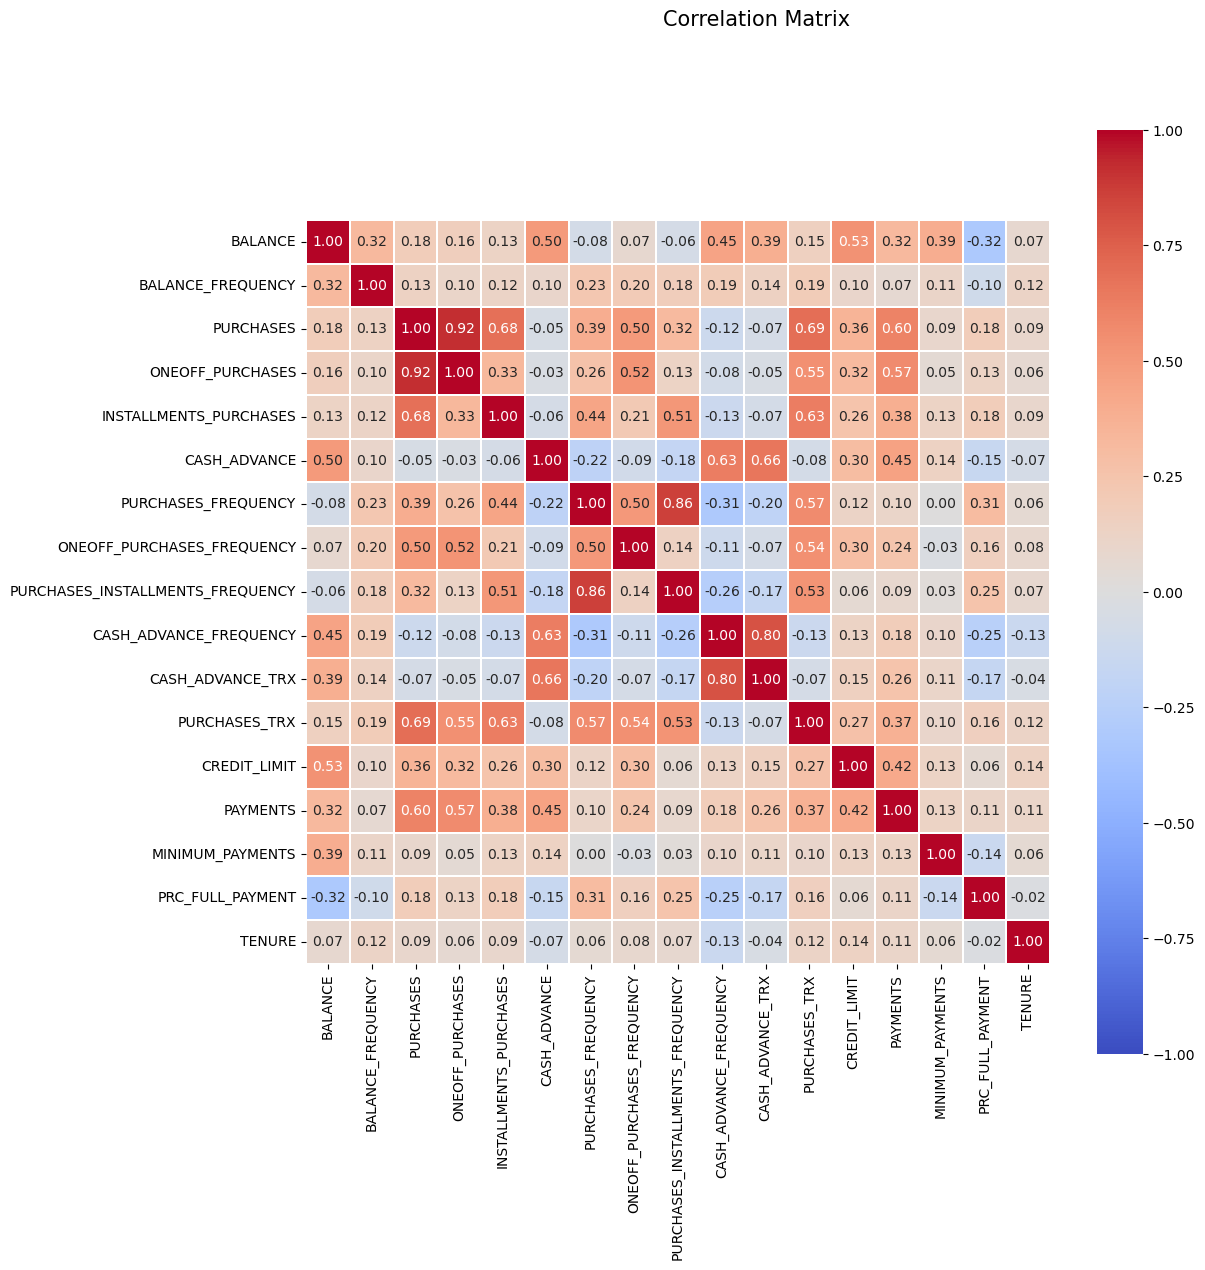

In [11]:
# display the correlation matrix using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 12))
plt.suptitle('Correlation Matrix', fontsize=15)

sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.1, vmax=1.0, vmin=-1.0, square=True)

plt.show()

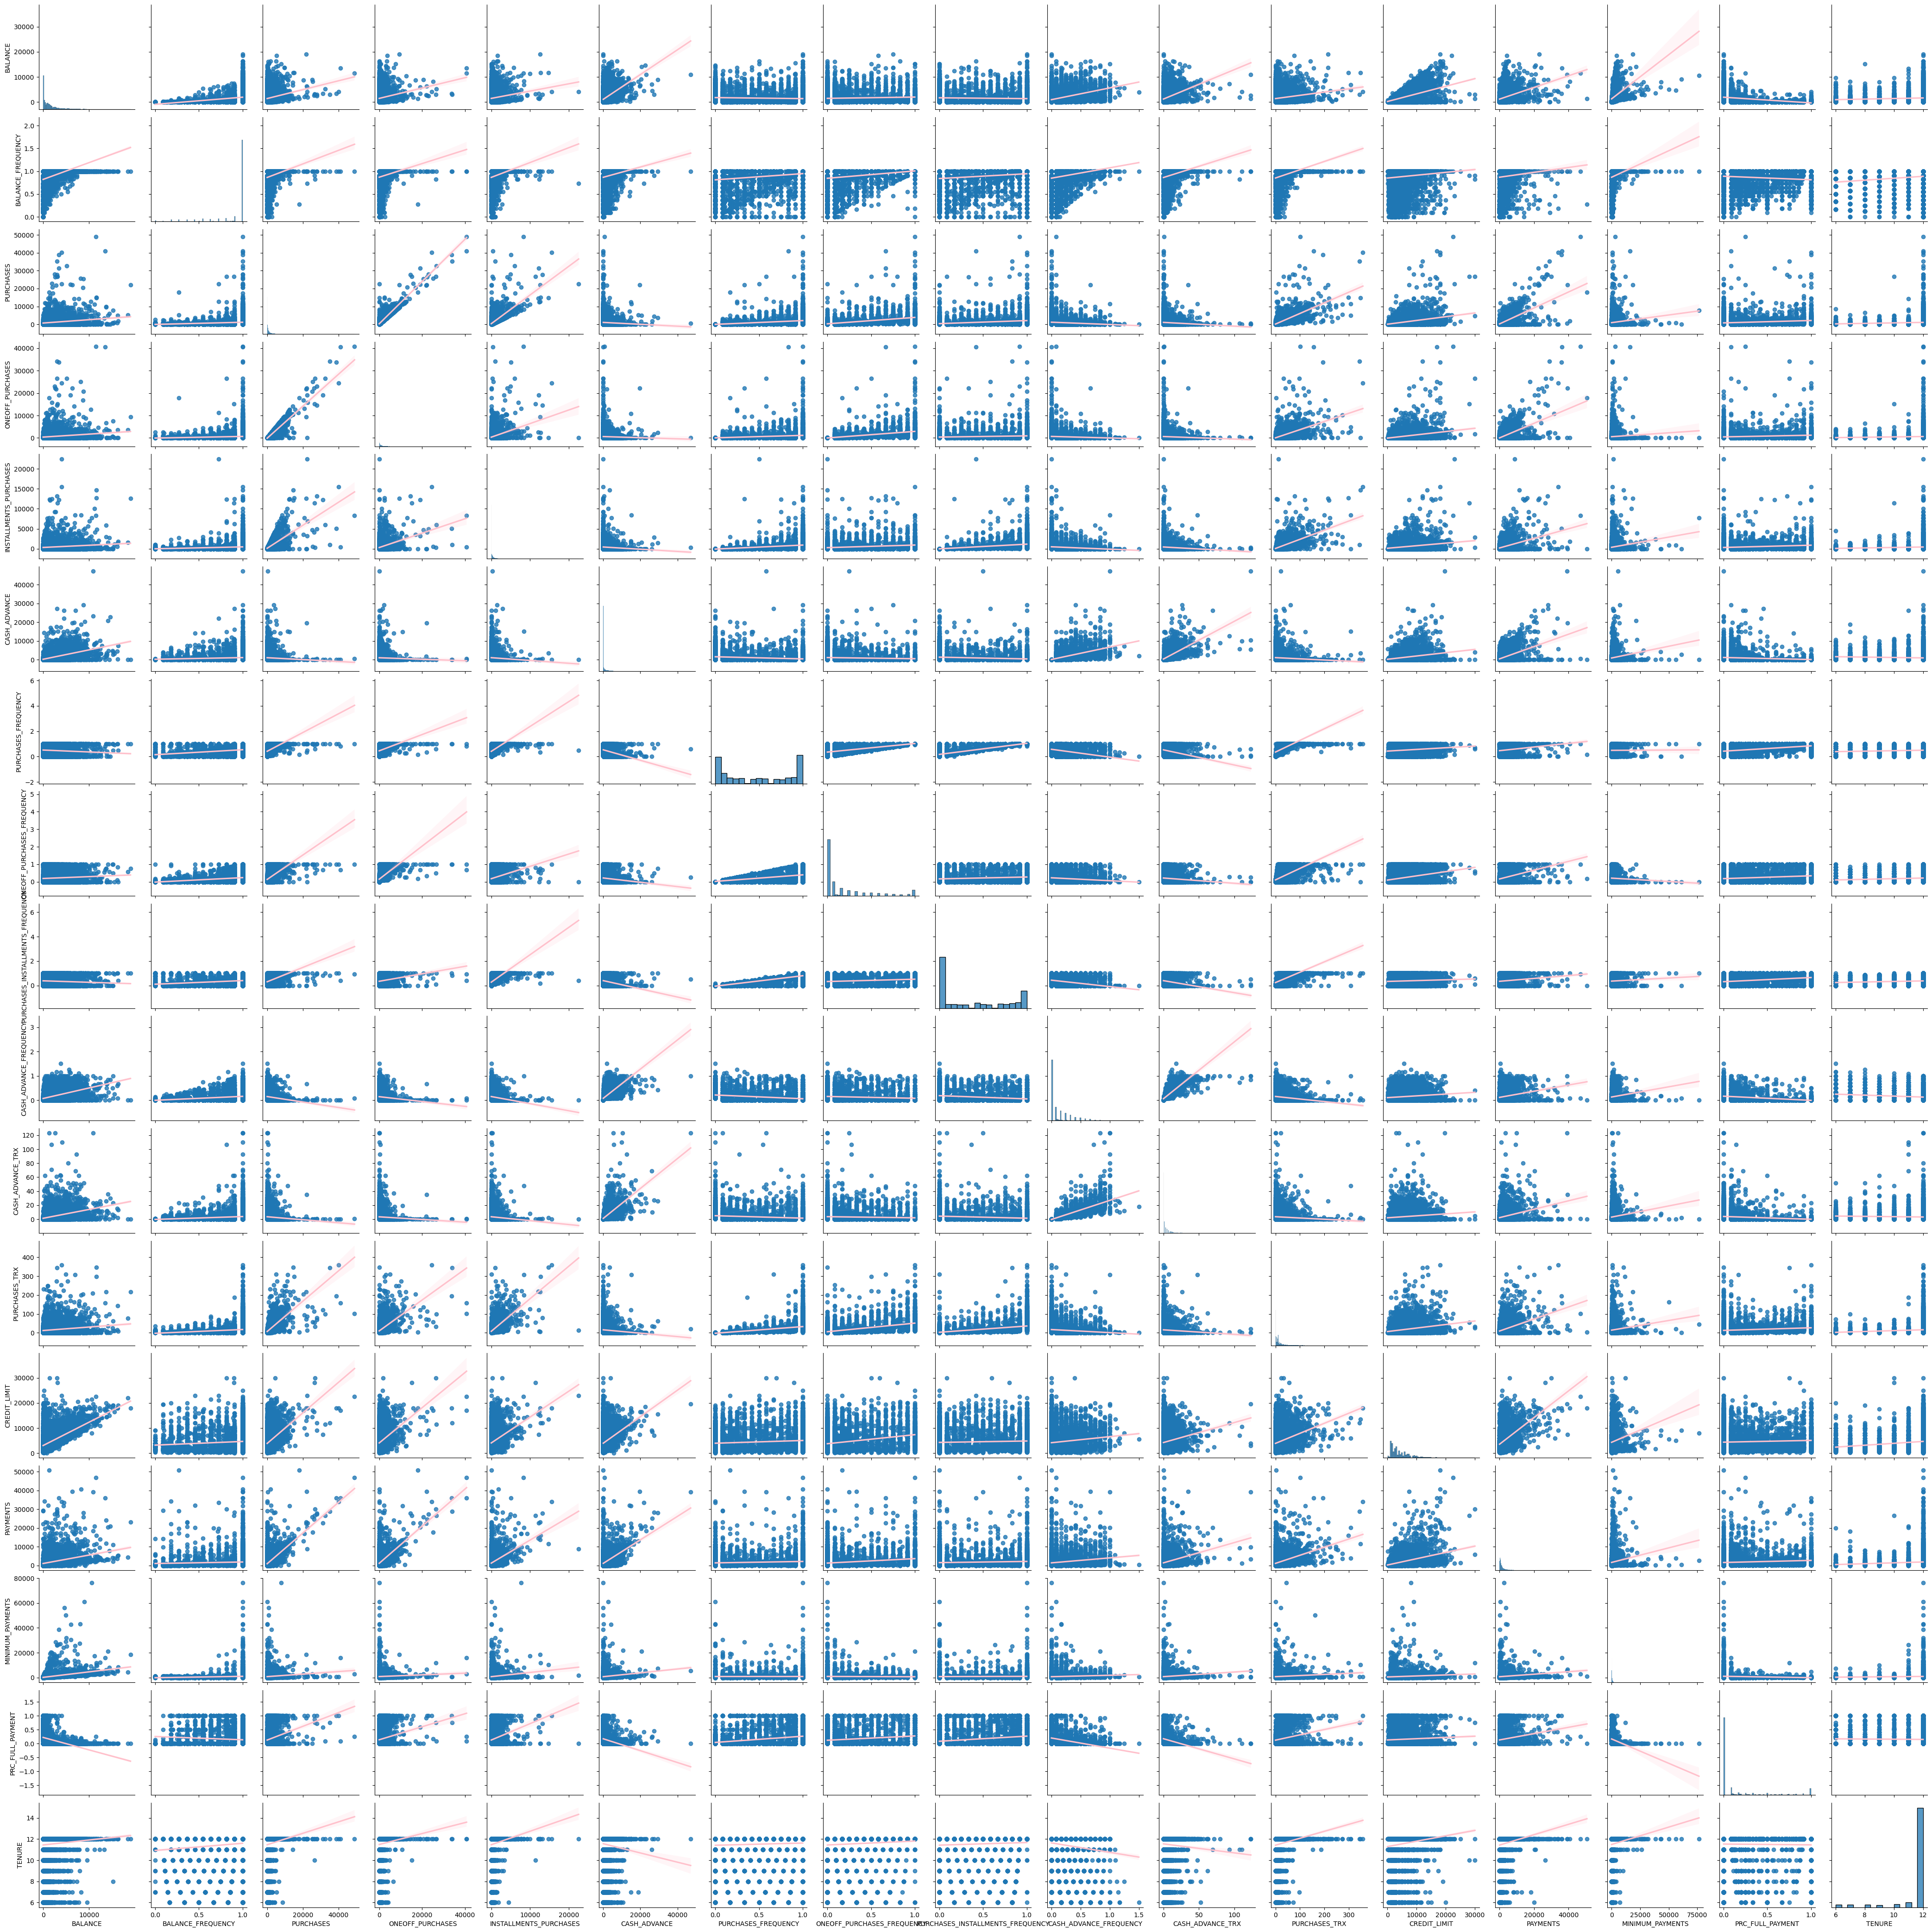

In [12]:
# display the pairplot using seaborn with a regression line
sns.pairplot(X, kind='reg', plot_kws={'line_kws':{'color':'pink'}})

**Observations**
1. The highest correlation exists between ONEOFF_PURCHASES and PURCHASES at 0.92; followed by 0.86 of PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY and by 0.80 of CASH_ADVANCE_TRX and CASH_ADVANCE FREQUENCY.
2. There is not a pair of features showing strong negative correlation.
3. Some groups of features are related from their definition. For group like CASH_ADVANCE, CASH_ADVANCE_TRX, and CASH_ADVANCE_FREQUENCY; INSTALLMENTS_PURCHASES and PURCHASES_INSTALLMENTS_FREQUENCY; ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY; their correlation are usually greater than 0.5.
4. In general, TENURE has low correlation with all other features. 
5. From the context as a credit card company, we may further examine the relationship between BALANCE, MINIMUM_PAYMENTS, PAYMENTS, CREDIT_LIMIT, CASH_ADVANCE, INSTALLMENTS_PURCHASES, 
ONEOFF_PURCHASES and PURCHASES. 
    * BALANCE has strong correlation with CASH_ADVANCE (0.50) and CREDIT_LIMIT (0.53); it means that entries with higher BALANCE, ususally comes with a higher CASH_ADVANCE and CREDIT_LIMIT.
    * MINIMUM_PAYMENTS does not have a strong correlation with other features except with BALANCE at 0.39.
    * PAYMENTS has strong correlation with PURCHASES (0.60) and ONEOFF_PURCHASES (0.57); it means that entries with higher PAYMENTS, ususally comes with a higher PURCHASES and ONEOFF_PURCHASES.
    * CREDIT_LIMIT only has a strong correlation with BALANCE (0.53)
    * CASH_ADVANCE only has a strong correlation with BALANCE (0.50)
    * INSTALLMENTS_PURCHASES only has a strong correlation with PURCHASES (0.68)
    * ONEOFF_PURCHASES has strong correlation with PURCHASES (0.92) and PAYMENTS (0.57); it means that entries with higher ONEOFF_PURCHASES, ususally comes with a higher PURCHASES and PAYMENTS.
    * PURCHASES has strong correlation with ONEOFF_PURCHASES (0.92), INSTALLMENTS_PURCHASES (0.68) and PAYMENTS (0.60); it means that entries with higher PURCHASES, ususally comes with a higher ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES and PAYMENTS.

#### 2. PCA

**1. Use *sklearn.preprocessing.MinMaxScaler* to scale the data. Print the header.**

In [13]:
# scale data
scaler = MinMaxScaler()

# put the scaled data to a pd DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# print the header
df_scaled.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  0.002148           0.818182   0.001945          0.000000   
1  0.168169           0.909091   0.000000          0.000000   
2  0.131026           1.000000   0.015766          0.018968   
3  0.087521           0.636364   0.030567          0.036775   
4  0.042940           1.000000   0.000326          0.000393   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                 0.00424      0.000000             0.166667   
1                 0.00000      0.136685             0.000000   
2                 0.00000      0.000000             1.000000   
3                 0.00000      0.004366             0.083333   
4                 0.00000      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000           0.00000       0.005587      0.031720   
1                0.166667           0.03252       0.000000      0.232053   
2                0.000000           0.00000       0.033520      0.248748   
3                0.055555           0.00813       0.002793      0.248748   
4                0.000000           0.00000       0.002793      0.038397   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  0.003979          0.001826          0.000000     1.0  
1  0.080893          0.014034          0.222222     1.0  
2  0.012264          0.008210          0.000000     1.0  
3  0.000000          0.011310          0.000000     1.0  
4  0.013374          0.003204          0.000000     1.0

**2. Use *sklearn.decomposition.PCA.fit_transform* to do a PCA transformation on the data without specifying the number of components. Print out the explained variance ratios and determine how many components to keep in order to have 95% of the explained variance ratio.**

In [14]:
# setup the PCA without specifying the number of components
pca = PCA()

# fit the PCA 
pca.fit_transform(df_scaled)

array([[-4.82164365e-01, -9.76561720e-02, -4.64568265e-02, ...,
        -6.30909614e-03, -3.32834072e-03, -6.78792375e-06],
       [-6.08577402e-01, -1.93794561e-02,  8.21425027e-02, ...,
         2.89836420e-03, -5.09924996e-02,  1.33504060e-07],
       [ 3.04506975e-01,  9.20945538e-01,  1.20416662e-02, ...,
        -1.51202358e-02,  8.03839994e-03,  9.03494995e-07],
       ...,
       [ 3.60388655e-01, -4.22646838e-01,  1.05921190e-01, ...,
         4.22589948e-04,  1.22531607e-02, -6.91486712e-06],
       [-6.46095047e-01, -2.04332427e-01,  2.81793182e-01, ...,
         1.74675033e-03,  1.43620068e-02, -3.64220954e-06],
       [-9.45977327e-02,  3.99577870e-01,  1.95888668e-01, ...,
         7.08927863e-03,  7.58733657e-03, -3.18293637e-06]])

In [15]:
# print the explained variance ratio
print(f'Explained Variance Ratio: \n {pca.explained_variance_ratio_}')

Explained Variance Ratio: 
 [4.95972062e-01 1.40540442e-01 1.28444886e-01 7.67657200e-02
 6.96341162e-02 3.58857827e-02 1.81931037e-02 1.35286304e-02
 6.55491219e-03 5.50923206e-03 2.84138895e-03 1.85835317e-03
 1.26760866e-03 1.22588168e-03 1.05724309e-03 7.20605839e-04
 3.12590252e-08]


In [16]:
# print the cumulative explained variance ratio in 4 decimal places
print(f'Cumulative Explained Variance Ratio: \n {np.cumsum(pca.explained_variance_ratio_).round(4)}')

Cumulative Explained Variance Ratio: 
 [0.496  0.6365 0.765  0.8417 0.9114 0.9472 0.9654 0.979  0.9855 0.991
 0.9939 0.9957 0.997  0.9982 0.9993 1.     1.    ]


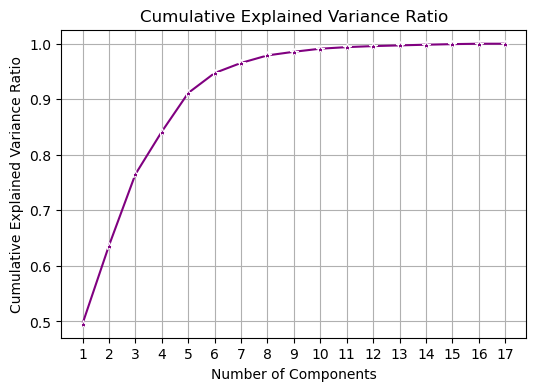

In [17]:
# plot the cumulative explained variance ratio using seaborn
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.lineplot(
    x=np.arange(1, len(pca.explained_variance_ratio_)+1), 
    y=np.cumsum(pca.explained_variance_ratio_), 
    marker='*', 
    color='purple')

ax.xaxis.set_ticks(np.arange(1, len(pca.explained_variance_ratio_)+1))
ax.grid(True)
ax.set_title('Cumulative Explained Variance Ratio', fontsize=12)
ax.set_xlabel('Number of Components', fontsize=10)
ax.set_ylabel('Cumulative Explained Variance Ratio', fontsize=10)

plt.show()

**Discussion**
1. We should cumulatively sum up the Explained Variance Ratio and see how many components would explain more than (or equal to) 95%.
2. From the cumulative sum and from the plot, the first 7 components explain more than 95% of the variance.  They explained 96.54%.

**3. Use *sklearn.decomposition.PCA.fit_transform* again to do a PCA transformation, this time setting n_components to keep 95% of the explained variance and save this to a new dataframe.**

In [18]:
# setup the PCA with 7 components
pca_n7 = PCA(n_components=7)

In [19]:
# fit the PCA with 7 components and save to a new DataFrame
df_n7 = pd.DataFrame(pca_n7.fit_transform(df_scaled))

#### 3. Clustering

**1. Create at least 12 different clustering models using k-means, hierarchical, and DBSCAN clustering; experiment with different choices of hyperparameters. Calculate the silhouette score for each model and tabulate the results.**

In [20]:
# setup the dict for the model and result
model_dict = {}

In [21]:
# define the function to put result to the dict
def model_result(model_name, type, s_score):
    model_dict[model_name] = [type, s_score]

#### k-means clustering

In [22]:
# setup a range as the number of clusters
range_n_clusters = range(2, 10)

# setup the empty list to store the silhouette scores for k-means
s_scores_km = []

# setup the empty list to store the inertia
inertia_km = []    

# loop through the range to cluster the data and compute the silhouette scores
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, init='random', n_init='auto', random_state=80)
    km_labels = kmeans.fit_predict(df_n7)
    s_scores_km.append(silhouette_score(df_n7, km_labels))
    inertia_km.append(kmeans.inertia_)

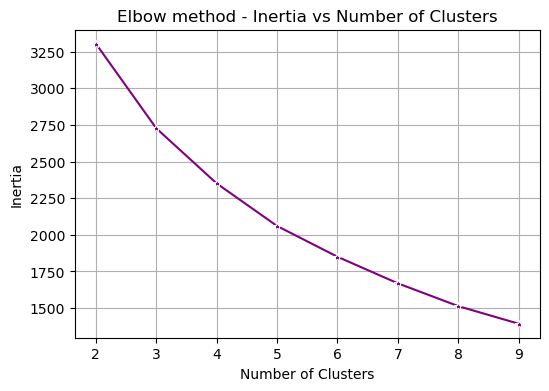

In [23]:
# plot the inertia against number of clusters
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.lineplot(x=range_n_clusters, y=inertia_km, color='purple', marker='*')

ax.set_title('Elbow method - Inertia vs Number of Clusters', fontsize=12)
ax.set_xlabel('Number of Clusters', fontsize=10)
ax.set_ylabel('Inertia', fontsize=10)
ax.grid(True)

plt.show()

In [24]:
# use the KneeLocator to find the elbow point
kl = KneeLocator(range(2, 10), inertia_km, curve="convex", direction="decreasing")

kl.elbow

5

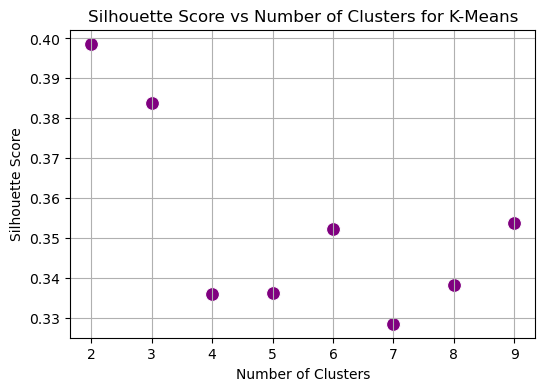

In [25]:
# plot the silhouette scores against number of clusters
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.scatterplot(x=range_n_clusters, y=s_scores_km, color='purple', marker='o', s=100)

ax.set_title('Silhouette Score vs Number of Clusters for K-Means', fontsize=12)
ax.set_xlabel('Number of Clusters', fontsize=10)
ax.set_ylabel('Silhouette Score', fontsize=10)
ax.grid(True)

plt.show()

**Discussion**
1. From the plot Elbow method - Inertia vs Number of Clusters, we can see the elbow is around 3, 4, 5, 6 clusters.
2. From the Silhouette Score vs Number of Clusters for K-Means plot, high silhouette score is achieved by 3, 6, 9 clusters.

In [31]:
# create a function to display the cluster
def display_cluster(labels, data=df_n7):
    fig, ax = plt.subplots(figsize=(6, 4))

    ax = sns.scatterplot(
        x=data[0], 
        y=data[1], 
        hue=labels, 
        palette='bright',
        style=labels, 
        s=20
    )

    ax.set_title('Scatter Plot of the First 2 Components with Model', fontsize=12)
    ax.set_xlabel('First Component', fontsize=10)
    ax.set_ylabel('Second Component', fontsize=10)

    plt.show()

In [27]:
# setup parameters for k-means to do grid search
para_grid = {'n_clusters':range(3, 7), 
             'init':['random', 'k-means++'], 
             'n_init':[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
             'random_state':[80]}

# perform grid search to find the best parameters for k-means
grid_search = GridSearchCV(
    KMeans(), 
    para_grid)

grid_search.fit(df_n7)

# print the best parameters
grid_search.best_params_

{'init': 'random', 'n_clusters': 6, 'n_init': 10, 'random_state': 80}

In [28]:
# best k-means model with 6 clusters
km_best = KMeans(init='random', n_clusters=6, n_init=10, random_state=80)

# fit the best k-means model
km_best.fit(df_n7)

KMeans(init='random', n_clusters=6, n_init=10, random_state=80)

In [29]:
# save the model using joblib
dump(km_best, 'km_best.joblib')

['km_best.joblib']

In [30]:
# get the silhouette score
s_score_km_best = silhouette_score(df_n7, km_best.fit_predict(df_n7))

# put the best k-means model to the dict
model_result('km_best', 'K-Means with 6 Clusters', s_score_km_best)

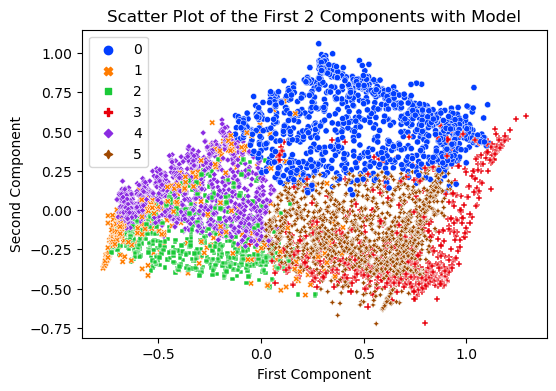

In [32]:
display_cluster(km_best.labels_)

#### hierarchical clustering - Agglomerative Clustering

**Discussion**
1. From K-Means clustering, we have evaluated that the appropriate number of clusters can be 3, 4, 5, 6 using elbow method.
2. We will use this information for in hierachical clustering.

In [33]:
# setup the different choices for hyperparameters
agg_parameter = {
    'agg_model_01': [None, 'euclidean', 'ward', 20],
    'agg_model_02': [3, 'euclidean', 'complete', None],
    'agg_model_03': [3, 'euclidean', 'ward', None],
    'agg_model_04': [4, 'euclidean', 'ward', None],
    'agg_model_05': [5, 'euclidean', 'ward', None],
    'agg_model_06': [6, 'euclidean', 'ward', None],
    'agg_model_07': [3, 'manhattan', 'complete', None],
    'agg_model_08': [4, 'manhattan', 'complete', None],
    'agg_model_09': [3, 'l1', 'complete', None],
    'agg_model_10': [3, 'l2', 'complete', None]
    }

agg_model_01


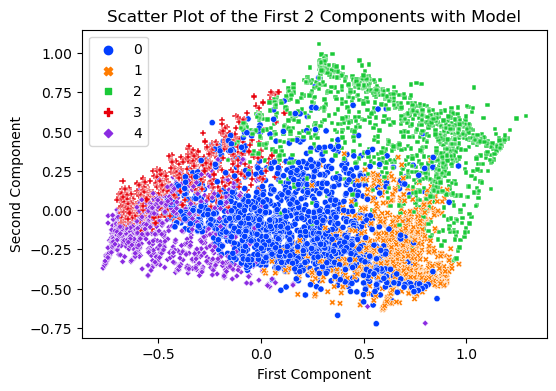

agg_model_02


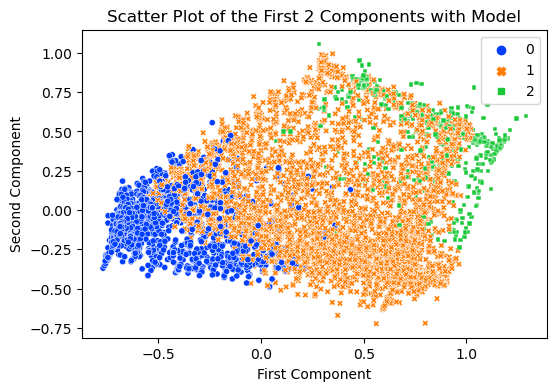

agg_model_03


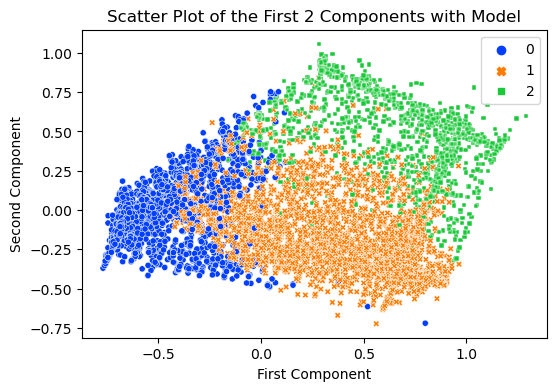

agg_model_04


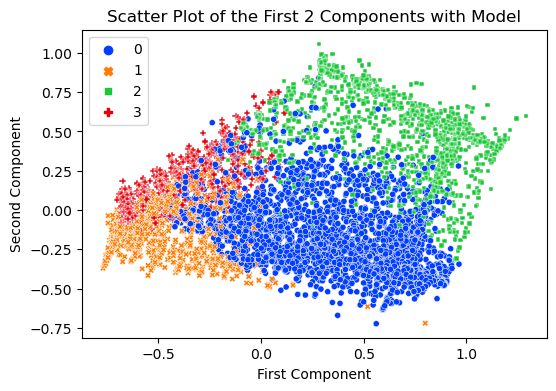

agg_model_05


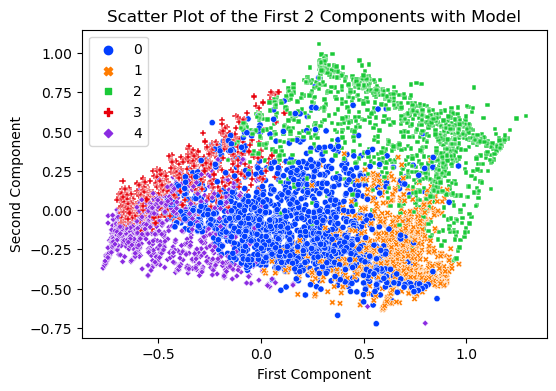

agg_model_06


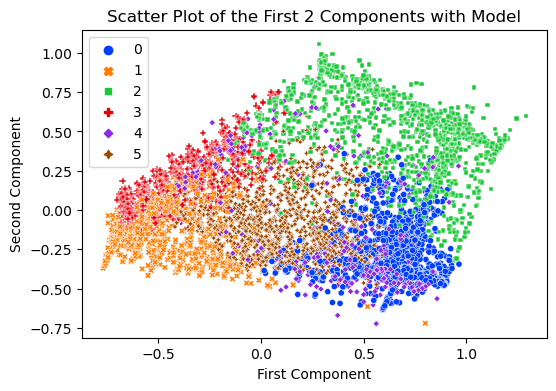

agg_model_07


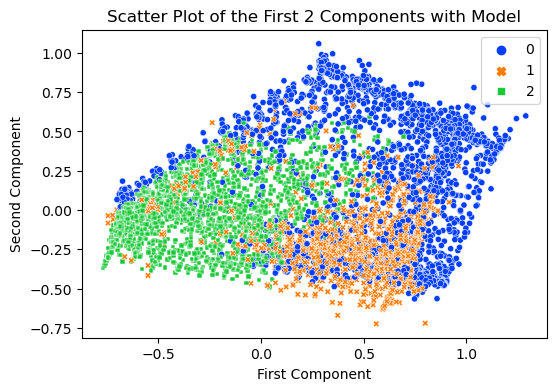

agg_model_08


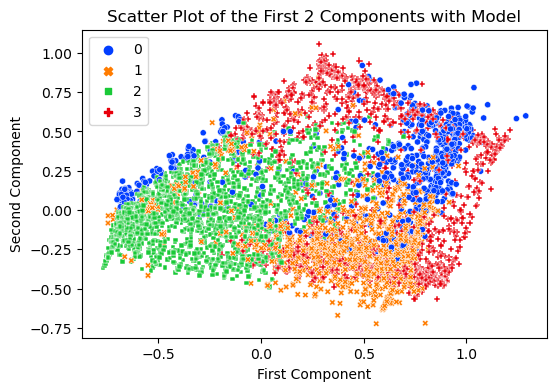

agg_model_09


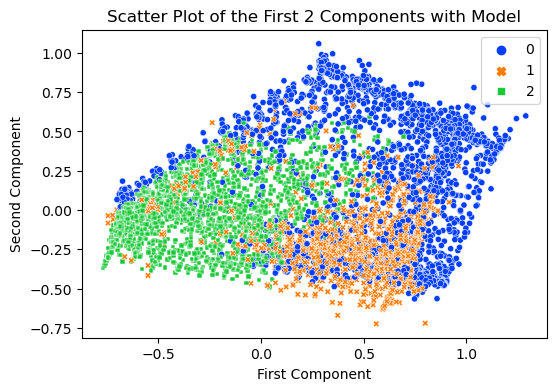

agg_model_10


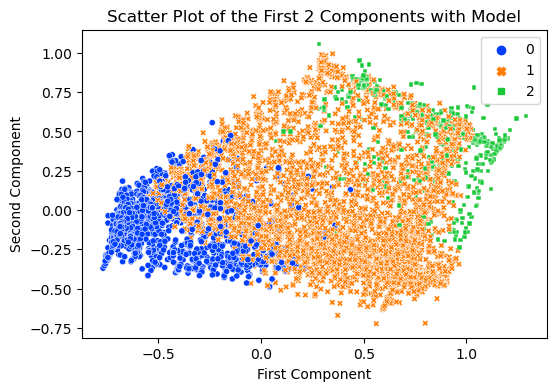

In [34]:
# run the AgglomerativeClustering algorithm for each hyperparameter and record the silhouette score
for k in agg_parameter:
    agg_clusterer = AgglomerativeClustering(
        n_clusters=agg_parameter[k][0],
        metric=agg_parameter[k][1],
        linkage=agg_parameter[k][2], 
        distance_threshold=agg_parameter[k][3]).fit(df_n7)
    agg_cluster_labels = agg_clusterer.labels_
    # get the silhouette score
    s_score_agg = silhouette_score(df_n7, agg_cluster_labels)
    # dump the model
    dump(agg_clusterer, f'{k}.joblib')
    agg_parameter[k].append(s_score_agg)
    model_result(
        k, 
        f'Agglomerative Clustering with {agg_parameter[k][0]} Clusters, {agg_parameter[k][1]}, {agg_parameter[k][2]}, {agg_parameter[k][3]}', 
        s_score_agg
        )
    print(k)
    display_cluster(agg_cluster_labels)

#### hierarchical clustering - Divisive Clustering

In [82]:
# setup the different choices for hyperparameters
div_parameter = {
   'div_model_01': ['ward', 'euclidean', 4, 'maxclust', None],
   'div_model_02': ['ward', 'euclidean', 17, 'inconsistent', 10],
   'div_model_03': ['ward', 'euclidean', 30, 'inconsistent', 20],
   'div_model_04': ['ward', 'euclidean', 22, 'distance', None],
   'div_model_05': ['complete', 'euclidean', 2.2, 'distance', None],
   'div_model_06': ['complete', 'euclidean', 11.5, 'inconsistent', 25],
   'div_model_07': ['complete', 'euclidean', 11.7, 'inconsistent', 30],
   'div_model_08': ['weighted', 'euclidean', 1.4, 'distance', None],
   'div_model_09': ['complete', 'minkowski', 2.1, 'distance', None],
   'div_model_10': ['complete', 'minkowski', 11.5, 'inconsistent', 25]
   }

div_model_01


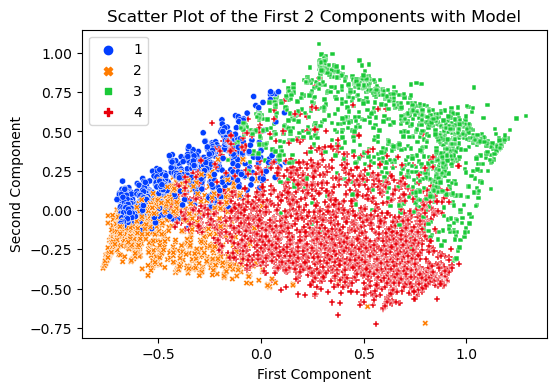

div_model_02


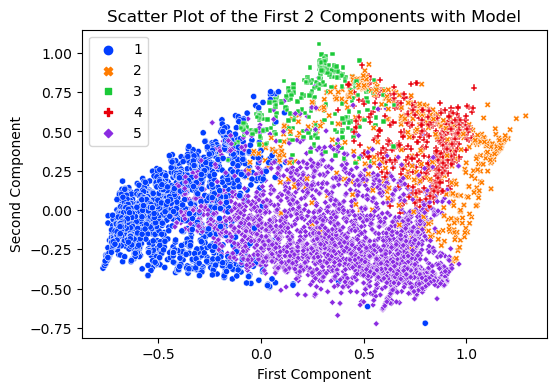

div_model_03


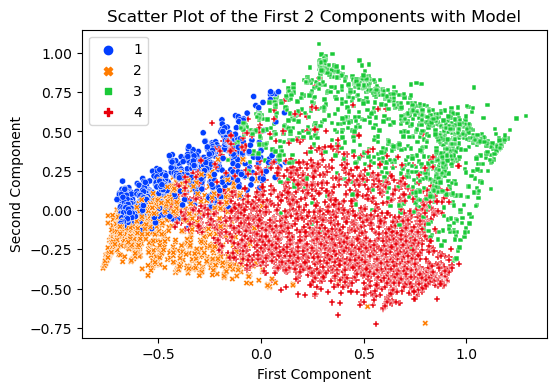

div_model_04


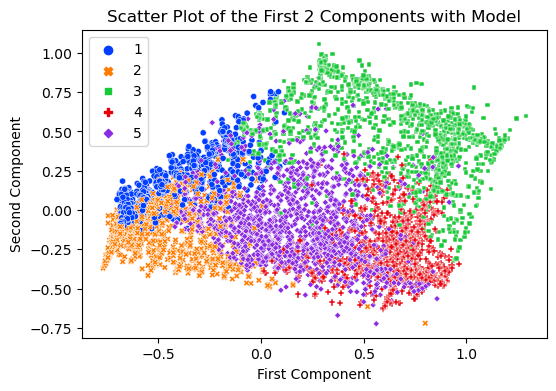

div_model_05


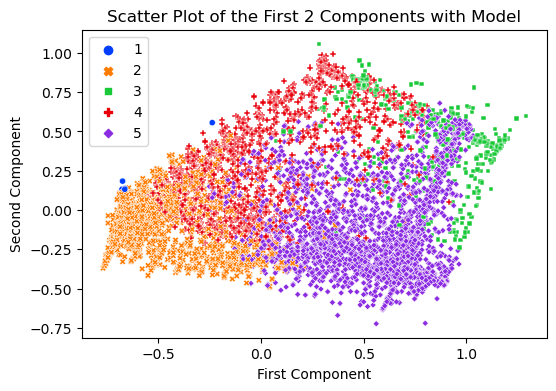

div_model_06


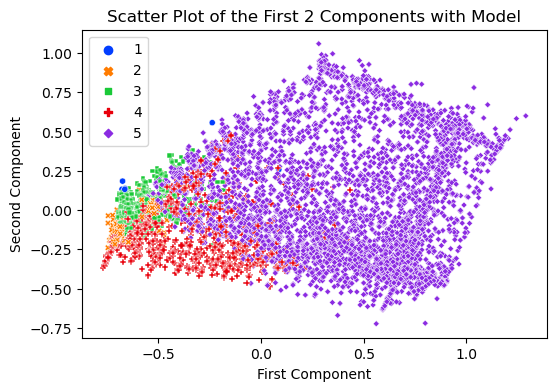

div_model_07


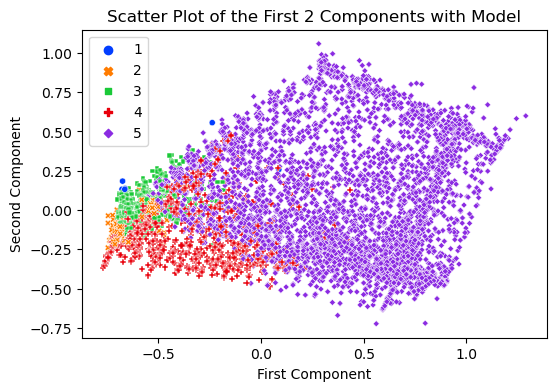

div_model_08


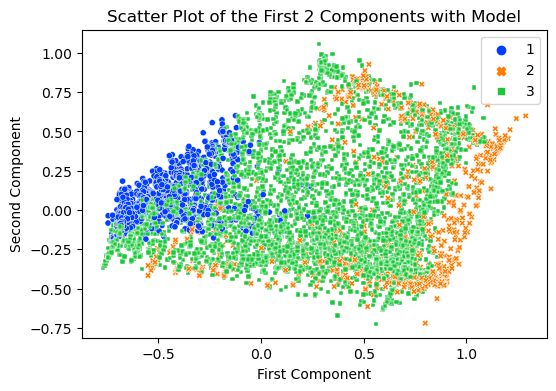

div_model_09


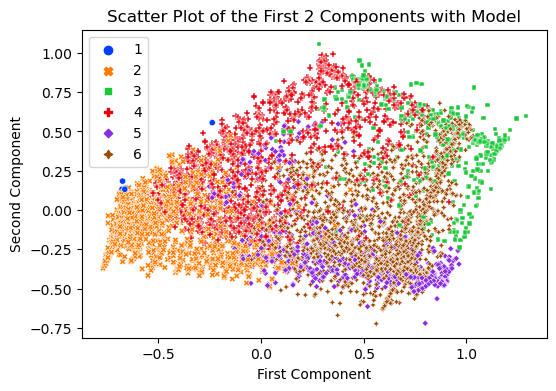

div_model_10


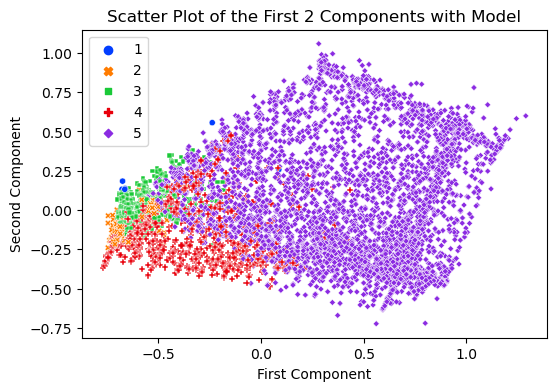

In [83]:
# run the fcluster algorithm for each hyperparameter and record the silhouette score
for k in div_parameter:
    div_clusterer = fcluster(linkage(df_n7, 
                                     method=div_parameter[k][0], 
                                     metric=div_parameter[k][1]), 
                                     t=div_parameter[k][2], 
                                     criterion=div_parameter[k][3], 
                                     depth=div_parameter[k][4])
    cluster_labels = div_clusterer
    # get the silhouette score
    s_score_div = silhouette_score(df_n7, cluster_labels)
    # dump the model
    dump(div_clusterer, f'{k}.joblib')
    div_parameter[k].append(s_score_div)
    model_result(
        k, 
        f'Divisive Clustering with {div_parameter[k][0]}, {div_parameter[k][1]}, {div_parameter[k][2]}, {div_parameter[k][3]}, {div_parameter[k][4]}', 
        s_score_div
        )
    print(k)
    display_cluster(cluster_labels)


#### DBSCAN clustering

**Discussion**
1. For min_samples consideration, we should at least use double of the dimension. The dimension is 7. Therefore, We should use at least 14. 
2. Considering the dataset of 9000 credit card users, we may estimate a clustering of a focused customer gorup should be at leaset 5%, i.e., 450.

In [55]:
# build the models [min_samples, metric, p, eps]
dbs_parameter = {
    'dbs_model_01': [450, 'euclidean', None, 0.309],
    'dbs_model_02': [450, 'manhattan', None, 0.6],   
    'dbs_model_03': [450, 'chebyshev', None, 0.22],  
    'dbs_model_04': [450, 'canberra', None, 2.5],
    'dbs_model_05': [450, 'braycurtis', None, 0.36],
    'dbs_model_06': [450, 'cosine', None, 0.08],
    'dbs_model_07': [450, 'correlation', None, 0.05],
}

dbs_model_01


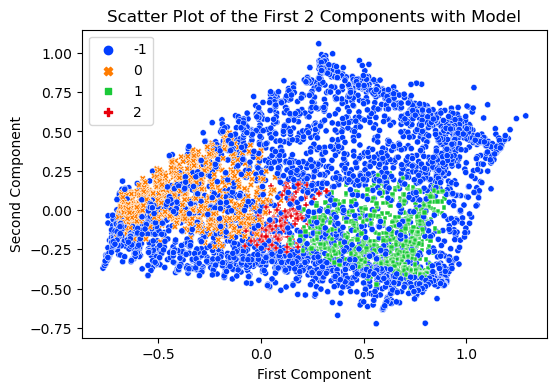

dbs_model_02


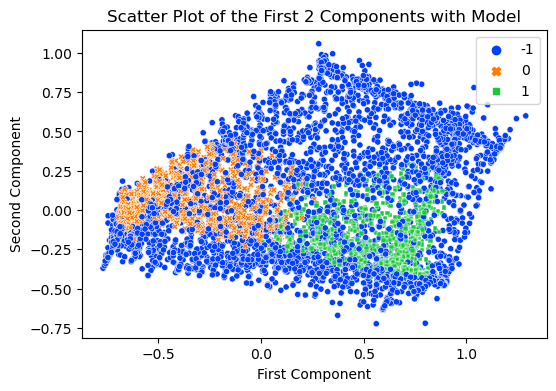

dbs_model_03


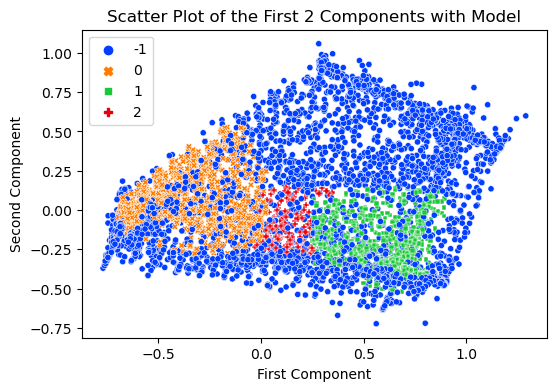

dbs_model_04


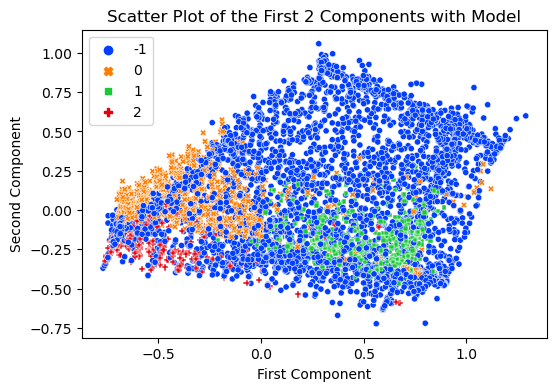

dbs_model_05


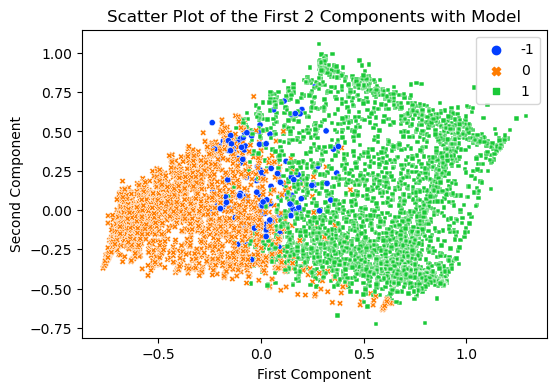

dbs_model_06


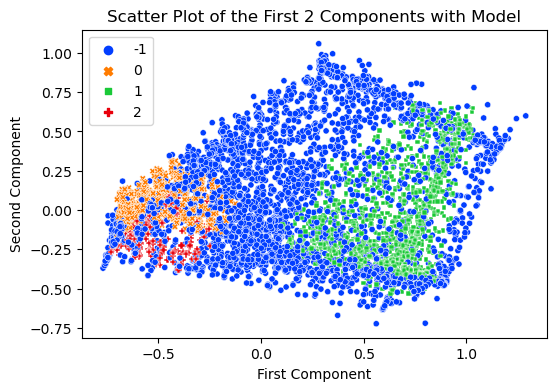

dbs_model_07


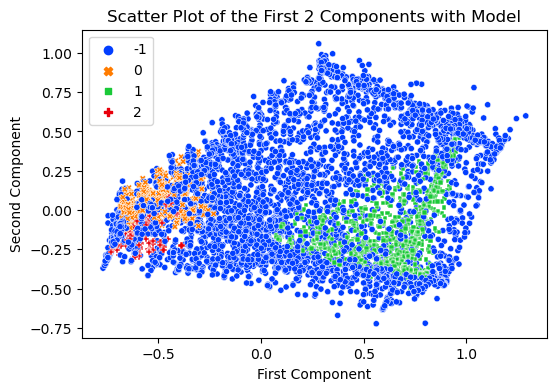

In [56]:
# run the models, store the silhouette score and save the models
for model in dbs_parameter:
    dbscan = DBSCAN(eps=dbs_parameter[model][3], 
                    min_samples=dbs_parameter[model][0], 
                    metric=dbs_parameter[model][1], 
                    p=dbs_parameter[model][2]).fit(df_n7)
    labels = dbscan.labels_
    # get the silhouette score
    scores = silhouette_score(df_n7, labels)
    # dump the model
    dump(dbscan, f'{model}.joblib')
    dbs_parameter[model].append(scores)
    model_result(
        model, 
        f'DBSCAN with eps {dbs_parameter[model][3]}, min_samples {dbs_parameter[model][0]}, {dbs_parameter[model][1]}, {dbs_parameter[model][2]}', 
        scores
        )
    print(model)
    display_cluster(labels)

#### Summary

In [84]:
# print the result using PrettyTable
t_t = pt.PrettyTable()
# setup the table header
t_t.field_names = ['Model', 'Type', 'Silhouette Score']
# add the rows to the table
for k in model_dict:
    t_t.add_row([k, model_dict[k][0], model_dict[k][1]])

# print the table
print(t_t.get_string(sortby='Silhouette Score', reversesort=True))

+--------------+----------------------------------------------------------------------+---------------------+
|    Model     |                                 Type                                 |   Silhouette Score  |
+--------------+----------------------------------------------------------------------+---------------------+
|   km_best    |                       K-Means with 6 Clusters                        |  0.352245339473626  |
| agg_model_03 |   Agglomerative Clustering with 3 Clusters, euclidean, ward, None    |  0.3173355034122796 |
| div_model_02 |    Divisive Clustering with ward, euclidean, 17, inconsistent, 10    | 0.27104612232075403 |
| agg_model_08 | Agglomerative Clustering with 4 Clusters, manhattan, complete, None  |  0.2659968364333812 |
| agg_model_09 |     Agglomerative Clustering with 3 Clusters, l1, complete, None     | 0.26488843723931965 |
| agg_model_07 | Agglomerative Clustering with 3 Clusters, manhattan, complete, None  | 0.26488843723931965 |
| div_mode

**2. Select the best model for the use case and justify your choice in markdown. How does the silhouette score compare with your best model from assignment 2?**

**Discussion**

We may use Silhouette Score as the first criteria, and check the scatter plot above to see how the top five models do.

In the order of Silhouette Score,
1. km_best model with 6 clusters gives a plot that that cluster 1, 2, 4 are overlapping each other. This is not the optimal model.
2. agg_model_03 gives a good plot that we can see 3 clusters quite clearly.
3. div_model_02 gives a plot that cluster 2, 3, 4 are overlapping each other. 
4. agg_model_08 gives a plot that cluster 0 and cluster 3 are overlapping the other two clusters.
5. agg_model_09 gives a plot that cluster 0 and 1 are overlapping to cluster 2.

Overall, agg_model_03, a Agglomerative Clustering with 3 Clusters, euclidean metric, ward linkage is the best model. Its Silhouette Score is 0.3173355034122796.

The Silhouette Score obtained from this assignment is lower than that in assignment 2; which is 0.3336350894872987.

In [106]:
# load the best model
best_model = load('agg_model_03.joblib')

#### 4. Conclusions

**1. Generate a scatter plot of the first two columns of the transformed data. Use the model predictions to colour the points according to the cluster they belong to. Use markdown to comment on the plot, and how it compares with the plot from assignment 2.**

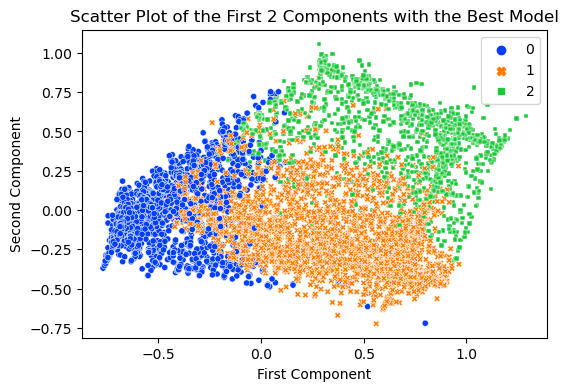

In [107]:
# scatter plot of the first 2 components with the best k-means model using seaborn
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.scatterplot(
    x=df_n7[0], 
    y=df_n7[1], 
    hue=best_model.labels_, 
    palette='bright',
    style=best_model.labels_, 
    s=20
)

ax.set_title('Scatter Plot of the First 2 Components with the Best Model', fontsize=12)
ax.set_xlabel('First Component', fontsize=10)
ax.set_ylabel('Second Component', fontsize=10)

plt.show()

**Discussion**
1. From the plot, we can observe that the clustered data points stay pretty closely to their cluster. 
2. With first two columns being the first two components, which accounted for 63.65% of covariance, we can see all the datapoints stay as one big mass.
3. Since the data is scaled, we can observe there is not many outliers.
3. Compared to the plot in assignment 2, this plot shows more visible and meaningful clusters. The visualization is easier to observe as the datapoints are not too overlapping on each other.

**2. Generate a histogram that shows the number of elements in each cluster. Use markdown to comment on the histogram.**

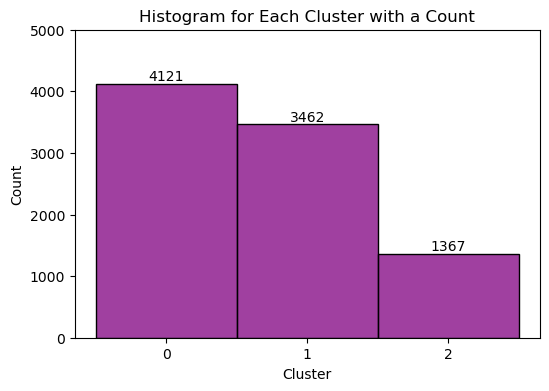

In [108]:
# generate a histogram for each cluster with a count using seaborn
fig, ax = plt.subplots(figsize=(6, 4))

ax = sns.histplot(
    data=best_model.labels_, 
    discrete=True,
    bins=3, 
    color='purple', 
    edgecolor='black'
)

ax.set_title('Histogram for Each Cluster with a Count', fontsize=12)
ax.set_xlabel('Cluster', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.bar_label(ax.containers[0])
ax.set_ylim(0, 5000)
ax.xaxis.set_ticks(np.arange(0, 3, 1))

plt.show()

**Discussion**
From the histogram, we can observe that the number of data points in each cluster varies. The largest cluster is Cluster 0 with 4121 data points and the smallest cluster is Cluster 2 with only 1367 data points. 

**3. Create a separate dataframe from the untransformed data for each cluster. Use *pandas.DataFrame.describe* to describe each cluster.**

In [109]:
# create a new DataFrame to store the cluster labels
clustered_df = X.copy()

# add the cluster labels to the DataFrame
clustered_df['cluster'] = best_model.labels_

In [110]:
# create a separate DataFrame for each cluster
cluster_0 = clustered_df[clustered_df['cluster'] == 0]
cluster_1 = clustered_df[clustered_df['cluster'] == 1]
cluster_2 = clustered_df[clustered_df['cluster'] == 2]

In [111]:
# describe the clusters
cluster_0.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   4121.000000        4121.000000   4121.000000       4121.000000   
mean    1749.347917           0.813106    271.617394        245.607391   
std     2077.561703           0.289595    811.505940        798.469673   
min        0.000000           0.000000      0.000000          0.000000   
25%      202.190447           0.636364      0.000000          0.000000   
50%     1101.085631           1.000000      9.680000          0.000000   
75%     2372.842569           1.000000    247.360000        200.510000   
max    14581.459140           1.000000  22101.780000      22101.780000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             4121.000000   4121.000000          4121.000000   
mean                26.160221   1416.130439             0.109172   
std                112.211505   2299.812922             0.148626   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.000000   
50%                  0.000000    456.396077             0.083333   
75%                  0.000000   1898.121821             0.166667   
max               3000.000000  26194.049540             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 4121.000000                       4121.000000   
mean                     0.082563                          0.027186   
std                      0.129966                          0.077035   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.100000                          0.000000   
max                      0.750000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             4121.000000       4121.000000    4121.000000   4121.000000   
mean                 0.193346          4.554720       2.248241   4190.633906   
std                  0.212230          7.569963       6.935715   3370.264494   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       0.000000   1500.000000   
50%                  0.142857          2.000000       1.000000   3000.000000   
75%                  0.300000          6.000000       3.000000   6000.000000   
max                  1.500000        123.000000     309.000000  23000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count   4121.000000       4121.000000       4121.000000  4121.000000   4121.0  
mean    1510.166749        863.160698          0.070808    11.443824      0.0  
std     2689.382580       2170.013576          0.201128     1.397227      0.0  
min        0.000000          0.055880          0.000000     6.000000      0.0  
25%      318.226488        188.777870          0.000000    12.000000      0.0  
50%      683.769908        424.623595          0.000000    12.000000      0.0  
75%     1569.501192        864.206542          0.000000    12.000000      0.0  
max    50721.483360      61031.618600          1.000000    12.000000      0.0

In [112]:
# describe cluster 1
cluster_1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   3462.000000        3462.000000   3462.000000       3462.000000   
mean    1245.297493           0.913216    956.116392        293.685188   
std     1890.937387           0.180790   1230.470041        671.048374   
min        0.000000           0.000000      0.000000          0.000000   
25%       69.358557           0.909091    289.757500          0.000000   
50%      511.697525           1.000000    564.270000          0.000000   
75%     1553.300864           1.000000   1176.000000        298.320000   
max    16304.889250           1.000000  22500.000000      11246.070000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             3462.000000   3462.000000          3462.000000   
mean               663.028426    610.824768             0.771910   
std                941.395744   1746.458829             0.237697   
min                  0.000000      0.000000             0.166667   
25%                208.940000      0.000000             0.583333   
50%                409.275000      0.000000             0.833333   
75%                796.590000    289.292240             1.000000   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 3462.000000                       3462.000000   
mean                     0.111624                          0.694167   
std                      0.172529                          0.279566   
min                      0.000000                          0.000000   
25%                      0.000000                          0.500000   
50%                      0.000000                          0.750000   
75%                      0.166667                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             3462.000000        3462.00000    3462.000000   3462.000000   
mean                 0.087622           2.13056      17.311092   3931.266025   
std                  0.174594           5.81326      18.093867   3285.684120   
min                  0.000000           0.00000       0.000000    300.000000   
25%                  0.000000           0.00000       8.000000   1500.000000   
50%                  0.000000           0.00000      12.000000   3000.000000   
75%                  0.083333           2.00000      21.000000   5500.000000   
max                  1.166667         123.00000     347.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count   3462.000000       3462.000000       3462.000000  3462.000000   3462.0  
mean    1332.984999        916.057498          0.188647    11.429809      1.0  
std     2025.566550       2776.176720          0.306946     1.481509      0.0  
min        0.000000          0.019163          0.000000     6.000000      1.0  
25%      359.947820        157.797184          0.000000    12.000000      1.0  
50%      743.809652        239.454735          0.000000    12.000000      1.0  
75%     1549.986967        853.119508          0.250000    12.000000      1.0  
max    40627.595240      76406.207520          1.000000    12.000000      1.0

In [113]:
# describe cluster 2
cluster_2.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   1367.000000        1367.000000   1367.000000       1367.000000   
mean    1815.484287           0.979670   3327.924674       2394.607381   
std     2425.467538           0.075691   4129.995845       3338.714922   
min        0.000000           0.000000      8.400000          8.400000   
25%      237.735368           1.000000   1240.290000        809.410000   
50%      837.950585           1.000000   2286.060000       1508.890000   
75%     2493.797421           1.000000   3940.780000       2725.945000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             1367.000000   1367.000000          1367.000000   
mean               933.317293    592.792662             0.926399   
std               1481.083023   2015.717082             0.126834   
min                  0.000000      0.000000             0.416667   
25%                  0.975000      0.000000             0.916667   
50%                464.970000      0.000000             1.000000   
75%               1209.320000    132.245041             1.000000   
max              15497.190000  29282.109150             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 1367.000000                       1367.000000   
mean                     0.793937                          0.546067   
std                      0.205779                          0.408967   
min                      0.166667                          0.000000   
25%                      0.666667                          0.041667   
50%                      0.833333                          0.636364   
75%                      1.000000                          1.000000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             1367.000000       1367.000000    1367.000000   1367.000000   
mean                 0.080040          2.144111      45.689100   6836.632972   
std                  0.174076          6.093861      40.340978   4307.112217   
min                  0.000000          0.000000       6.000000    300.000000   
25%                  0.000000          0.000000      20.000000   3550.000000   
50%                  0.000000          0.000000      33.000000   6000.000000   
75%                  0.083333          1.000000      57.000000   9000.000000   
max                  1.000000         62.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  cluster  
count   1367.000000       1367.000000       1367.000000  1367.000000   1367.0  
mean    3418.760963        736.044083          0.315179    11.960497      2.0  
std     4393.070499       1352.997682          0.387113     0.229371      0.0  
min        0.000000          3.197940          0.000000    10.000000      2.0  
25%     1151.778027        180.354623          0.000000    12.000000      2.0  
50%     2100.802868        263.487020          0.083333    12.000000      2.0  
75%     3983.833766        851.224001          0.666667    12.000000      2.0  
max    46930.598240      21235.065300          1.000000    12.000000      2.0

**4. Provide a written conclusion to describe each group of customers to the marketing strategy team.**

**Discription of each group of customers**

1. cluster 0:
* This is the largest group of credit card customers, with 46% of total.
* This group has the lowest in BALANCE_FREQUENCY, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, PURCHASES_INSTALLMENTS_FREQUENCY, PURCHASES_TRX, PRC_FULL_PAYMENT.
* This group has medium in BALANCE, CREDIT_LIMIT, PAYMENTS, MINIMUM_PAYMENTS.
* This group has the highest in CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX.

This group of customers does not use the credit card very often. In contrast to their low purchases, they have high balance and high cash advance.

2. cluster 1:
* This group is about 39% of the credit card customers.
* This group has the lowest in BALANCE, CASH_ADVANCE_TRX, CREDIT_LIMIT, PAYMENTS.
* This group has medium in BALANCE_FREQUENCY, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, PURCHASES_TRX, PRC_FULL_PAYMENT
* This group has the highest in PURCHASES_INSTALLMENTS_FREQUENCY, MINIMUM_PAYMENTS.

This group of customers are moderate credit card user. They tend to use the credit card for installments purchase.

3. cluster 2:
* This group is about 15% of the credit card customers.
* This group has the lowest in CASH_ADVANCE, CASH_ADVANCE_FREQUENCY, MINIMUM_PAYMENTS.
* This group has medium in PURCHASES_INSTALLMENTS_FREQUENCY, CASH_ADVANCE_TRX.
* This group has the highest in BALANCE, BALANCE_FREQUENCY, PURCHASES, PURCHASES_FREQUENCY, ONEOFF_PURCHASES, ONEOFF_PURCHASES_FREQUENCY, INSTALLMENTS_PURCHASES, PURCHASES_TRX, CREDIT_LIMIT, PAYMENTS, PRC_FULL_PAYMENT.

This group of customers frequently use the credit card for all types of purchases in large amount; but they may not have cash advance ready for the purchases.